<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity

from gensim.models import Word2Vec 
import gensim.downloader as api

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# !pip install streamlit

In [3]:
!pip install transformers

In [4]:
from transformers import pipeline

In [5]:
!pip install pyLDAvis

In [6]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')

In [9]:
xls.sheet_names

['Concepts']

In [10]:
# Reading the data as pandas dataframe
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [11]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,Python language was created in 1991\n\nLike an...,There are 32 keywords in C++ and 35 keywords i...,"data types (Numeric, Boolean, String, Datetime)","Integers or whole numbers (1,2,-5,1000), Float...","Arithmatic Operation (addition[+], subtraction...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name (must start with letter or under...,Boolean Variable (true or false)\n\nComparison...,"Perfect number, a positive integer that is equ...",...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,What is the order of precedence in python?\n\n...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,NaN,NaN
1,"a word, a phrase, a sentence, a paragraph or a...","sequence, indexing","string' or ""string"" \n\ndouble quotes are used...",print('Use \n to print a new line'),string indexing begins from 0,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",string[:] If you do not specify the starting ...,"slicing with step size, string[3:14:2] means f...",str' object does not support item assignment m...,...,"String functions, print(), type(), len()\n\nor...","String methods \n\nstring.lower(), string.uppe...",first_name = 'Rahul'\nlast_name = 'Modi'\n\nfu...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,for color print\n\nfrom termcolor import color...,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [12]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Concept-1    99 non-null     object
 1   Concept-2    94 non-null     object
 2   Concept-3    94 non-null     object
 3   Concept-4    92 non-null     object
 4   Concept-5    92 non-null     object
 5   Concept-6    88 non-null     object
 6   Concept-7    87 non-null     object
 7   Concept-8    86 non-null     object
 8   Concept-9    83 non-null     object
 9   Concept-10   79 non-null     object
 10  Concept-11   76 non-null     object
 11  Concept-12   71 non-null     object
 12  Concept-13   65 non-null     object
 13  Concept-14   59 non-null     object
 14  Concept-15   54 non-null     object
 15  Concept-16   44 non-null     object
 16  Concept-17   40 non-null     object
 17  Concept-18   37 non-null     object
 18  Concept-19   30 non-null     object
 19  Concept-20   22 non-null     ob

## **4. Cleaning and Preparation of Text Documents**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [13]:
relavant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [14]:
data_science_df_clean=data_science_df[relavant_features]

In [15]:
# Imputation of null values with null string
data_science_df_clean=data_science_df_clean.fillna("")

In [16]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Concept-1   99 non-null     object
 1   Concept-2   99 non-null     object
 2   Concept-3   99 non-null     object
 3   Concept-4   99 non-null     object
 4   Concept-5   99 non-null     object
 5   Concept-6   99 non-null     object
 6   Concept-7   99 non-null     object
 7   Concept-8   99 non-null     object
 8   Concept-9   99 non-null     object
 9   Concept-10  99 non-null     object
 10  Concept-11  99 non-null     object
 11  Concept-12  99 non-null     object
 12  Concept-13  99 non-null     object
 13  Concept-14  99 non-null     object
 14  Concept-15  99 non-null     object
 15  Concept-16  99 non-null     object
 16  Concept-17  99 non-null     object
 17  Concept-18  99 non-null     object
 18  Concept-19  99 non-null     object
 19  Concept-20  99 non-null     object
dtypes: object(20

In [17]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['Concept-1']=='No data')]

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,Concept-11,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20
24,No data,,,,,,,,,,,,,,,,,,,
38,No data,,,,,,,,,,,,,,,,,,,
65,No data,,,,,,,,,,,,,,,,,,,
66,No data,,,,,,,,,,,,,,,,,,,
71,No data,,,,,,,,,,,,,,,,,,,


In [18]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['Concept-1']!='No data')].reset_index()

In [19]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [20]:
# Creating documents combining all the concepts columns
data_science_df_clean['documents']=['' for k in range(len(data_science_df_clean['Concept-1']))]
for k in data_science_df_clean.index:
  data_science_df_clean['documents'][k]=' '.join(list(data_science_df_clean.iloc[k].values))

In [21]:
data_science_df_clean['documents']

0     Python language was created in 1991\n\nLike an...
1     a word, a phrase, a sentence, a paragraph or a...
2     List is a data structure to store multiple ite...
3     These are data structures to store multiple it...
4     Instructions that a Python interpreter can exe...
                            ...                        
89    Difference between image classification and ob...
90    Face Verification \n\n> Input image, name/ID\n...
91    Examples of Models with sequence data\n\n1. Sp...
92    NLP and Word Embedding\n\n> Embedding and enco...
93    Sequence to sequence model\n\n1. Machine trans...
Name: documents, Length: 94, dtype: object

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [22]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

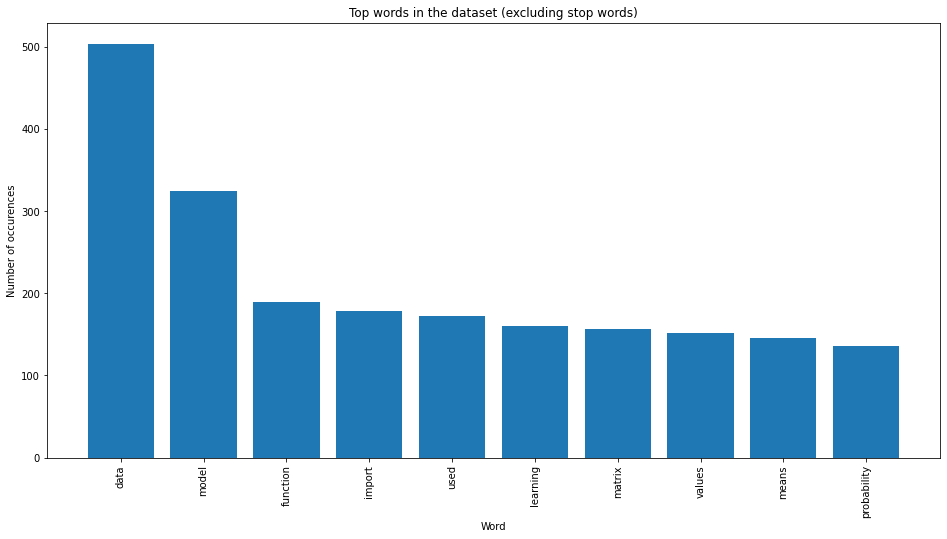

In [23]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

Text Pre-processing

In [24]:
# writing text processing function
def text_process(text):
    text = text.lower()
    nopunc =[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [25]:
# Finding top words in the documents
text_data=data_science_df_clean['documents'].apply(text_process)  # basic preprocessing

count_vectorizer = CountVectorizer(stop_words='english')
data_science_df_clean['top_5_words']=[[] for k in range(len(data_science_df_clean['documents']))]
for k in data_science_df_clean.index:
  words, word_values = get_top_n_words(n_top_words=5,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=text_data[k:(k+1)])
  data_science_df_clean['top_5_words'][k]=words

In [26]:
# Joining the top words for vectorization
data_science_df_clean['top_5_words_joined']=[' '.join(k) for k in data_science_df_clean['top_5_words']]

In [27]:
# Tokenization
data_science_df_clean['data_tokens'] = [k.split() for k in data_science_df_clean['documents'].apply(text_process)]

In [28]:
data_science_df_clean.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,documents,top_5_words,top_5_words_joined,data_tokens
0,Python language was created in 1991\n\nLike an...,There are 32 keywords in C++ and 35 keywords i...,"data types (Numeric, Boolean, String, Datetime)","Integers or whole numbers (1,2,-5,1000), Float...","Arithmatic Operation (addition[+], subtraction...","In mathematics and computer science, the floor...",Variable is the storing place in computer memo...,Variable name (must start with letter or under...,Boolean Variable (true or false)\n\nComparison...,"Perfect number, a positive integer that is equ...",...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,,Python language was created in 1991\n\nLike an...,"[python, variable, strong, data, ii]",python variable strong data ii,"[python, language, created, 1991, like, comput..."
1,"a word, a phrase, a sentence, a paragraph or a...","sequence, indexing","string' or ""string"" \n\ndouble quotes are used...",print('Use \n to print a new line'),string indexing begins from 0,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",string[:] If you do not specify the starting ...,"slicing with step size, string[3:14:2] means f...",str' object does not support item assignment m...,...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,for color print\n\nfrom termcolor import color...,String matching\n\nimport re\n pattern = re.co...,"a word, a phrase, a sentence, a paragraph or a...","[string, index, slicing, means, print]",string index slicing means print,"[word, phrase, sentence, paragraph, entire, en..."


In [29]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean['documents'].apply(text_process).values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python language created 1991 like computer programming language python tokens smallest meaningful part statementexpression command 1 keywords basic words language 2 identifiers programmer defined words program 3 literals data data structure 4 punctuations etc 5 operators 32 keywords c 35 keywords python python keywords false await else import pass none break except raise true class finally return continue lambda try def nonlocal assert del global async elif yield data types numeric boolean string datetime integers whole numbers 1251000 floats real numbers 12052e2 2e2 complex numbers 2e2 called scientific notation means 2102 arithmatic operation addition subtraction multiplication division floor division exponentiation remainder modulus 124 0 134 12 1 45 4 130o7 6 mathematics computer science floor function function takes input real number x gives output greatest integer less equal x denoted floor ⌊x⌋ similarly ceiling function maps x least integer greater

Lemmatization

In [30]:
# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # Run in terminal: python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# # Do lemmatization keeping only Noun, Adj, Verb, Adverb
# data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

Create the Document-Word matrix

In [31]:
# vectorizer = CountVectorizer(analyzer='word',       
#                              min_df=10,                        # minimum reqd occurences of a word 
#                              stop_words='english',             # remove stop words
#                              lowercase=True,                   # convert all words to lowercase
#                              token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
#                              # max_features=50000,             # max number of uniq words
#                             )

# data_vectorized = vectorizer.fit_transform(data_lemmatized)

Check the Sparsicity

In [32]:
# # Materialize the sparse data
# data_dense = data_vectorized.todense()

# # Compute Sparsicity = Percentage of Non-Zero cells
# print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

# **Building of Topic Model**

Building LDA model with sklearn and hyperparameter tuning

In [33]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [34]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Model Perplexity:  1815.87


Let's visualize the LDA model with pyLDAvis

In [35]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  30.362880
0       51.163364 -159.968018       2        1  24.898818
2      -73.144554   21.523815       3        1  19.351057
1      -66.410133 -110.606438       4        1  14.100669
4       54.417324   12.443444       5        1  11.286576, topic_info=             Term        Freq       Total Category  logprob  loglift
1861        layer   87.000000   87.000000  Default  30.0000  30.0000
2792   regression   68.000000   68.000000  Default  29.0000  29.0000
3836       vector   79.000000   79.000000  Default  28.0000  28.0000
1216       docker   39.000000   39.000000  Default  27.0000  27.0000
2021       matrix  137.000000  137.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2496  probability   13.270287  119.737587   Topic5  -5.4842  -0.0182
3725         true   10.510111   32.379261   Topic5  -5.7174   1.0564
3786         used   12.190290  149.858685   Topic5  -5.5691  -0.3275
2029         mean   10.895057   65.758991   Topic5  -5.6814   0.3839
2122     multiple   10.537144   96.899704   Topic5  -5.7148  -0.0372

[382 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         5  0.916233       005
17        3  0.767376        16
98        3  0.921717        77
102       3  0.848532        95
102       5  0.077139        95
...     ...       ...       ...
3933      5  0.767049  workbook
3970      2  0.835773        xy
3971      2  0.910435       xyz
3978      4  0.852118      yolo
3979      5  0.735531     ypred

[727 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

Let's see the dominant topic in each document

In [36]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,1.000000,0.000000,0.000000,0.000000,0.000000,0
Doc1,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc2,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc3,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc4,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc5,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc6,0.980000,0.000000,0.000000,0.000000,0.000000,0
Doc7,0.990000,0.000000,0.000000,0.000000,0.000000,0
Doc8,0.000000,1.000000,0.000000,0.000000,0.000000,1
Doc9,0.000000,0.500000,0.000000,0.500000,0.000000,1


Review topics distribution across documents

In [37]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,25
1,3,25
2,2,19
3,1,13
4,4,12


Let's see the Topic’s keywords

In [38]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,005,02,049,05,09mindf,10,100,1000,10k,...,zscore,zwx,γu,θt,θx1,μ1,μ2,σ1,σ2,σz
Topic0,2.200033,0.2,0.201405,0.2,0.200122,0.200000,1.412028,1.879623,0.992092,4.199767,...,0.200000,3.199046,0.208400,0.201035,0.200000,0.200000,0.200000,0.200000,2.199888,2.199999
Topic1,0.200000,0.2,0.200000,4.2,5.199928,2.199522,4.006388,0.201354,1.200031,0.200000,...,0.200000,0.200000,0.210364,3.198691,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
Topic2,0.200000,0.2,2.153185,0.2,0.200000,0.200000,5.024028,0.200420,2.404513,0.200233,...,0.200000,0.200431,0.200000,0.200274,0.200000,2.195944,2.195983,1.883514,0.205865,0.200000
Topic3,1.199966,0.2,0.200000,0.2,0.200000,0.200478,5.226272,4.518362,0.203294,0.200000,...,5.199975,0.200523,3.181236,0.200000,2.199999,0.204016,0.204016,2.516484,9.194246,0.200000
Topic4,0.200000,3.2,0.245409,0.2,1.199949,0.200000,2.331284,4.200241,1.200070,0.200000,...,2.200025,0.200000,0.200000,0.200000,0.200000,1.200039,0.200000,0.200000,0.200001,0.200000


Get the top 15 keywords each topic

In [39]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,matrix,data,layer,vector,function,model,network,list,learning,means,input,neural,set,used,linear
Topic 1,import,word,model,time,data,words,decision,text,used,series,multiple,node,tree,called,value
Topic 2,data,model,learning,table,set,different,training,function,values,ml,plot,column,error,image,analysis
Topic 3,data,distribution,random,file,probability,python,used,mean,function,sample,import,table,number,variables,population
Topic 4,regression,data,model,docker,hypothesis,test,linear,error,tableau,value,performance,indicators,line,null,values


# **Building of Question-Answering Model**

In [40]:
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [41]:
question="who is the father of machine learning?"
question_words = text_process(question).split()
question_words

['father', 'machine', 'learning']

In [42]:
# vectorization of top_5_words and question
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
text_sample = list(data_science_df_clean['top_5_words_joined'].values)
text_sample.append(question)
print('Document before vectorization: {}'.format(text_sample[94]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[94]))

Document before vectorization: who is the father of machine learning?
Document after vectorization: 
  (0, 143)	1
  (0, 96)	1
  (0, 153)	1


In [43]:
# # vectorization of top_5_words and question

# text_sample = data_science_df_clean['top_5_words_joined']

# print('Document before vectorization: {}'.format(text_sample[93]))
# model = Word2Vec(sentences=text_sample, size=5, window=2, min_count=2, workers=4, sg=0)
# document_term_matrix = text_sample.apply(model.vectorize)

# print('Document after vectorization: \n{}'.format(document_term_matrix[93]))

In [44]:
word_match=[]
vec_1=document_term_matrix[94]     # Question vector
for k in range(len(data_science_df_clean.documents)):
  vec_2=document_term_matrix[k]     # Individual document vector
  word_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
try:
  if max(word_match)<=0.25:
    print("Sorry ! I have no experience for this question.")
    
  else:
    context=data_science_df_clean.documents[word_match.index(max(word_match))]
    
    ans = ques_ans_pipeline(question=question, context=context)
    print(f"\nAnswer: {ans['answer']}")
    print(f"\nMatching of question with context: {round(max(word_match),2)}")
        
except:
  print("There is an exception")  

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)



Answer: Geoffrey Everest Hinton

Matching of question with context: 0.26


In [45]:
# from transformers import BertForQuestionAnswering, AutoTokenizer

# modelname = 'deepset/bert-base-cased-squad2'

# model = BertForQuestionAnswering.from_pretrained(modelname)
# tokenizer = AutoTokenizer.from_pretrained(modelname)

In [46]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])

# **Conclusion**